In [1]:
%matplotlib inline
from scipy.stats import rv_continuous
import numpy as np
import os
from numpy import radians as rad
from numpy import exp, sqrt, sin, cos
from scipy.integrate import quad
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import capLib as ca
import fdulib as vdf
import sys
plt.ion()
plt.close('all')

In [2]:
v_g = np.array([0., 220.,0.]) # galactic rotational velocity
v_s = np.array([10., 5., 7.]) # Sun proper motion
beta = np.array([rad(174.4697), rad(59.575), rad(29.812)]) # degrees->denotes eliptic lat
epsilon1 = np.array([-0.9931, -0.1170,0.01032])
epsilon2 = np.array([-0.067, 0.4927,-0.8676])
T = np.array([76.1, 156.3, 352.4]) # phases in days

In [3]:
v_Sun = 220.#vdf.v_Sun
v_esc = vdf.v_esc
v_0 = vdf.v_shm
sun = ca.get_Sun()
n1= vdf.get_n(vdf.shm_gal)
n2= vdf.get_n(vdf.mao_gal)
n3= vdf.get_n(vdf.lin_gal)
u_e = 29.79 # km/s fornengo 
e = 0.016722
lambda0 = rad(13.) # degrees
w = 2. * np.pi / 365.
v_0 = 220.
sigma = sqrt((v_0**2) / 2)
v_min = 0
v_max = 650
sigma_x = sigma
sigma_y = sigma
sigma_z = sigma
v_Sun = v_g + v_s
print v_Sun

[  10.  225.    7.]


/usr/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


Gaussian $$g(x,\,\mu,\,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp{-\frac{(x-\mu)^2}{2\sigma^2}}$$

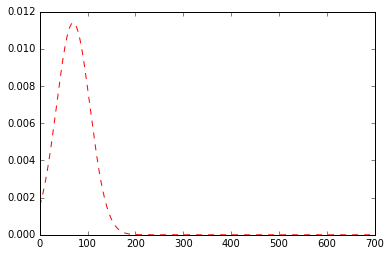

In [6]:

def gaussian(x,mu,sigma):
    return (1/sqrt(2 * np.pi * sigma**2)) * exp(-(x-mu)**2 / (2 * sigma**2))

v_array =np.arange(0,700)
gauss =  np.vectorize(gaussian)
aux1 = gauss(v_array,70,35.)
aux = v_array * v_array * aux1 
array = aux/sum(aux)
v_2 = [x**2 for x in range(-0,700)] 
fig, ax = plt.subplots() 
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.plot(v_array,aux1,'r--',linewith)

Double gaussian to take into account the Dark Disc:

$$ g_{DD}(x, \mu, \sigma, x_{lag}, \sigma_{DD})=\frac{1}{10}g(x,\mu+x_{lag},\sigma_{DD})+\frac{9}{10}g(x,\mu,\sigma)$$ 

the first term correspond to the consideration that $10\%$ of the local density is in a Dark Disc and the rest in the ussual population 

225.0
10.0


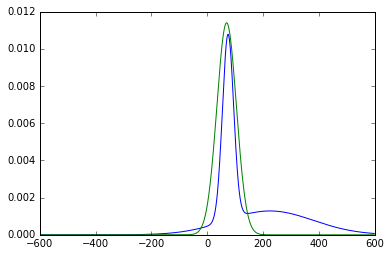

In [5]:
####### variables for disc ######
mu=v_Sun[1]
print mu
xlag =-70.
sigDD= sigma/4.
section = 1/2.
#################################
def gaus_w_disc(x,mu,sigma,xlag,sigDD):
    dark_disc = section*gaussian(x,mu-xlag, sigDD)
    galac_disc = (1-section)*gaussian(x,mu,sigma)
    return dark_disc + galac_disc
v_array =range(-600,600)
fig, ax = plt.subplots() 
#ax.set_ylim([0,0.0025])
#ax.set_xscale('log')
#ax.set_yscale('log')
darkdisc = gauss(v_array,70,35.)
ax.plot(v_array,gaus_w_disc(v_array,v_Sun[1],sigma,150,20))
ax.plot(v_array,darkdisc)
print v_Sun[0]

In [6]:
sigma_Strong=np.sqrt((220**2)/2)
sigma_mild=np.sqrt((300**2)/2)
sigma_Sdisc = np.sqrt((3*(50*sqrt(2))**2)/2)
sigma_mdisc = np.sqrt(3*(200**2)/2)
print sigma_Sdisc

86.6025403784


In [7]:


def maxwellian_3D_dist(v):
    def integrand(theta, phi):
        f_x = gaussian(v*sin(theta)*cos(phi),v_Sun[0],sigma)
        f_y = gaussian(v*sin(theta)*sin(phi),v_Sun[1],sigma)
        f_z = gaussian(v*cos(theta),v_Sun[2],sigma)
        return f_x * f_y * f_z * (v**2) * sin(theta)
    result = integrate.nquad(integrand,[[0,np.pi],[0,2*np.pi]])[0]
    if v%100==0:
        print v
    return result

def strong_disc(v):
    section = 1/3.
    disc = section*gaussian(v,70,28.)
    halo = (1-section)*maxwellian_3D_dist(v)
    result = disc + halo
    return result



v_array =range(0,800,5)
array_result = map(strong_disc,v_array)


0
100
200
300
400
500
600
700


In [8]:
def mild_disc(v):
    section = 1/3.
    disc = section*gaussian(v,200,80.)
    halo = (1-section)*maxwellian_3D_dist(v)
    result = disc + halo
    return result


mild_result = map(mild_disc,v_array)

0
100
200
300
400
500
600
700


In [9]:
def mild_disc2(v):
    section = 1/2.
    disc = section*gaussian(v,200,80.)
    halo = (1-section)*maxwellian_3D_dist(v)
    result = disc + halo
    return result


mild_result2 = map(mild_disc2,v_array)

0
100
200
300
400
500
600
700


In [10]:
maxwellian = map(maxwellian_3D_dist,v_array)

0
100
200
300
400
500
600
700


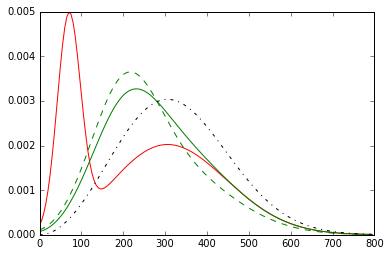

In [11]:
fig, ax = plt.subplots()
ax.plot(v_array,array_result,'r-')
ax.plot(v_array,mild_result, 'g-')
ax.plot(v_array,mild_result2,'g--')
ax.plot(v_array,maxwellian,'k-.')

3D Maxwellian distribution:
$$M_{3D} = g(v_x, -v_{x}^{Sun},\sigma_x)\,g(v_y, -v_y^{Sun},\sigma_y)\,g(v_z, -v_{z}^{Sun},\sigma_z)$$
where 
$$v_x=v\,\sin{\theta}\,\cos{\phi}$$
$$v_y=v\,\sin{\theta}\,\sin{\phi}$$
$$v_z=v\,\cos{\theta}$$

In [12]:
def maxwellian3D(v,phi,theta):
    vvec = np.array([v* sin(theta)* cos(phi),
                     v* sin(theta)* sin(phi),
                     v * cos(theta)])
    term = gaussian(vvec[0],v_Sun[0],sigma) * gaussian(vvec[1],v_Sun[1], sigma) * gaussian(vvec[2], v_Sun[2],sigma)
    return term * v**2 * sin(theta)


when considering a dark disc we have:
    $$M_{3D-DD} = g(v_x, -v_{x}^{Sun},\sigma_x)\,g_{DD}(v_y,-v_y^{Sun},\sigma,v_{lag,\sigma_{DD}})\,g(v_z, -v_{z}^{Sun},\sigma_z)$$
    

In [13]:
def maxwellian3D_DarkDisc(v,phi,theta):
    vvec = np.array([v* sin(theta)* cos(phi),
                     v* sin(theta)* sin(phi),
                     v * cos(theta)])
    
    term = maxwellian3D(v,phi,theta) * gaus_w_disc(vvec[1],v_Sun[1],sigma,-70,sigma/4) * gaussian(vvec[2], v_Sun[2],sigma)
    return term * v**2 * sin(theta)

In [14]:
def capture3D(m):
    def integrand(v,phi,theta,m):
        return maxwellian3D(v,phi,theta) * ca.caprate_GOU(v,m) / v
    result=integrate.nquad(integrand,[[0,v_esc],[0,2 * np.pi],[0,np.pi]], args=(m,))
    return result[0]

def capture3D_DarkDisc(m):
    def integrand(v,phi,theta,m):
        return maxwellian3D_DarkDisc(v,phi,theta) * ca.caprate_GOU(v,m) / v
    result=integrate.nquad(integrand,[[0,v_esc],[0,2 * np.pi],[0,np.pi]], args=(m,))
    return result[0]

def capture3DFunction(m,f):
    print m
    def integrand(v):
        return f(v) * ca.caprate_GOU(v,m) / v
    result=integrate.quad(integrand,0,v_esc)
    return result[0]


In [15]:
capture_thisDD = np.vectorize(capture3D_DarkDisc)
capture_this = np.vectorize(capture3DFunction)

In [16]:
x_array = np.logspace(0.1, 3, num=100)

vsun_array = np.array([v_Sun for i in x_array])

mild_disc_capt = capture_this(x_array,mild_disc)
maxw_capt = capture_this(x_array,maxwellian_3D_dist)

1.25892541179
1.25892541179
1.34676843584
1.4407408118
1.54127022251
1.64881419291
1.76386217227
1.88693776179
2.01860109755
2.15945139979
2.31012970008
2.47132175872
2.64376118575
2.82823277973
3.02557609948
3.23668928504
3.46253314524
3.70413553049
3.9625960107
4.23909087958
4.53487850813
4.8513050717
5.18981067662
5.55193591439
5.93932887307
6.35375263808
6.79709331622
7.27136861961
7.77873704869
8.32150771583
8.90215085445
9.52330906149
10.1878093242
10.8986758864
11.6591440118
12.4726747089
13.3429704818
14.2739921817
15.2699770326
16.3354579158
17.4752840001
18.6946428106
19.9990838383
21.3945437965
22.8873736398
24.4843674682
26.1927934482
28.0204268911
29.9755856401
32.0671679257
34.3046928631
36.6983437752
39.2590145382
41.9983591617
44.9288448277
48.0638086306
51.4175182768
55.0052370187
58.8432931203
62.9491541699
67.3415065775
72.0403406199
77.067041419
82.4444862693
88.197148756
94.3512101377
100.934678502
107.977516233
115.511776377
123.571748521
132.194114847
141.4181170

In [17]:
#w_disc = capture_thisDD(x_array)

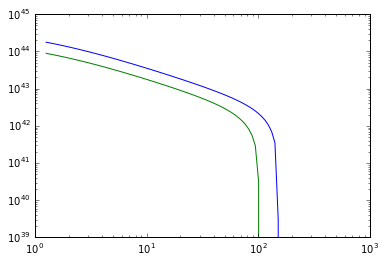

In [18]:
fig, ax = plt.subplots() 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(x_array,mild_disc_capt)
ax.plot(x_array,maxw_capt)
#ax.plot(x_array,capture_NODisc,'k--',linewidth=2.)

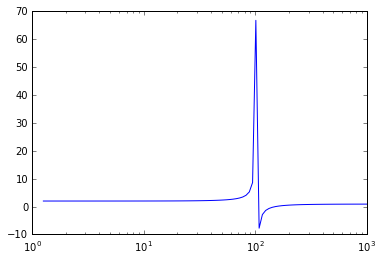

In [19]:
nuevo = mild_disc_capt/ maxw_capt
fig, ax = plt.subplots() 
ax.set_xscale('log')
#ax.set_yscale('log')
ax.plot(x_array,nuevo)
#ax.plot(x_array,maxw_capt)

In [20]:
x_array = np.logspace(0.1, 4, num=100)
def get_array(filename):
    file = open(filename)
    array = np.zeros(100)
    for ln in file:
        row = ln.split(' ')
        if row[0]=='\n':
            continue
        if row[0]=='#':
            min_v = float(row[2])
            continue
        index=int(float(row[0]))
        vals=[2,4,6,8,10]
        cont=0
        for i in range(0, len(row)):
            if len(row[i])<4:
                continue
            if row[i][-1]==']':
                array[5*index+cont]= row[i][0:-1]
            else:
                array[5*index+cont]= row[i]
            cont +=1
    array = np.append(array,min_v)
    return array   

def get_plot(path,ax):
    file_list = os.listdir(path)
    for fn in file_list:
        #print fn
        if fn[0]=='o':
            aux = get_array(path+'/'+fn)
            Iv_min, v_Min = aux[0:-1],aux[-1]
            if v_Min==0.:
                line = 'r-'
            elif v_Min%100==0:
                line = 'b--'
            else:
                line = 'b-'
            Iv_mint1 = Iv_min[0]
            if fn[3]=='5':
                aux = Iv_min
                Iv_min[65] = (Iv_min[64]+Iv_min[66])/2
            ax.plot(x_array, Iv_min/Iv_mint1, line, linewidth=1.2)
    return 
  

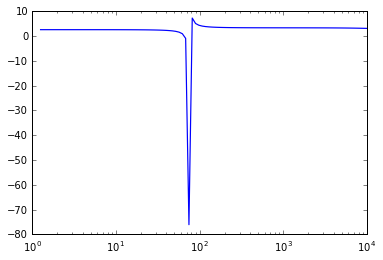

In [21]:
fig ,ax= plt.subplots()
ax.set_xscale('log')
#ax.set_yscale('log')
aux = get_array('dataNoDisc/out/out0NoDisc.txt')
noDisc, noDiscMin = aux[0:-1],aux[-1]
#ax.plot(x_array, noDisc, 'r', linewidth=1.2)
aux = get_array('dataDisc/out/out0Disc.txt')
disc, min = aux[0:-1],aux[-1]
#ax.plot(x_array, disc, 'b', linewidth=1.2)
boost = disc/noDisc
ax.plot(x_array, boost, 'b', linewidth=1.2)
#get_plot('dataDisc/out/',ax)
#get_plot('dataNoDisc/out/',ax)


In [22]:
array = []
array2 = []
x_array = np.logspace(0.1, 4, num=100)
#x_array = np.append(x_array, 10000)
final = v_Sun[1]+v_esc
print final
x = [i for i in np.arange(0.1,v_Sun[1]+v_esc)]

def product(m,f):
    """
    the producto to be inside the integral
    """
    global x
    def inside_int(u):
        va = vdf.gal_to_sun(u,f)
        va2 = ca.caprate_GOU(u, m)#, rms=str(f)[10])
        if va2 < 0:
                va2 = 1e-15
        return va * va2
    array = map(inside_int,x)
    final = np.trapz(array)
    return final


769.0


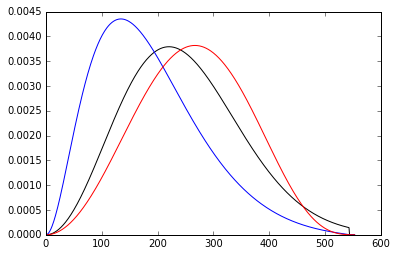

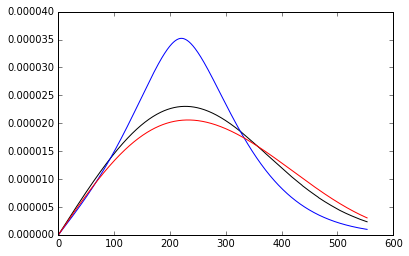

In [23]:
x = [i for i in np.arange(0.1,v_Sun[0]+v_esc)]


SHM = map(vdf.shm_gal, x)
MAO = map(vdf.mao_gal,x)
LIN = map(vdf.lin_gal,x)
fig0 ,ax0 = plt.subplots()
ax0.plot(x, SHM,'k-')
ax0.plot(x, MAO,'b-')
ax0.plot(x, LIN,'r-')


sun=np.vectorize(vdf.gal_to_sun)

SHM_sun = sun(x,vdf.shm_gal)#*n1
MAO_sun = sun(x,vdf.mao_gal)#*n2
LIN_sun = sun(x,vdf.lin_gal)#*n3
fig1 ,ax1 = plt.subplots()
ax1.plot(x, SHM_sun,'k-')
ax1.plot(x, MAO_sun, 'b-')
ax1.plot(x, LIN_sun, 'r-')


In [24]:
sigma = v_0/sqrt(2)
def fdv_i(vi,sigma):
    data = np.random.normal(vi, sigma, 20000)
    bins = np.arange(-600+vi,600+vi,10)
    line  = np.histogram(data, bins=bins, normed=1)
    return line, data

def v_EARTH(t):
                X = (2*np.pi/365.)*(t-79.55)
                v_eliptic = u_e*((-epsilon1*cos(X))+(epsilon2*sin(X)))
                v = v_g + v_s# + v_eliptic
                modulus = sqrt(v[0]**2 + v[1]**2 + v[2]**2) 
                return v, modulus



In [25]:
# earth velocity 
v_earth,_ = v_EARTH(152)
# wimps velocity distribution per coordinate
fdv_r,data_r = fdv_i(v_Sun[0],sigma)
fdv_theta, data_theta = fdv_i(v_earth[1],sigma)
fdv_phi, data_phi = fdv_i(v_earth[2],sigma)


modulus_NOdisc=sqrt(data_r**2 + data_theta**2 + data_phi**2)
bins = np.arange(0,800,10)
modNO_DD  = np.histogram(modulus_NOdisc, bins=bins, normed=1)



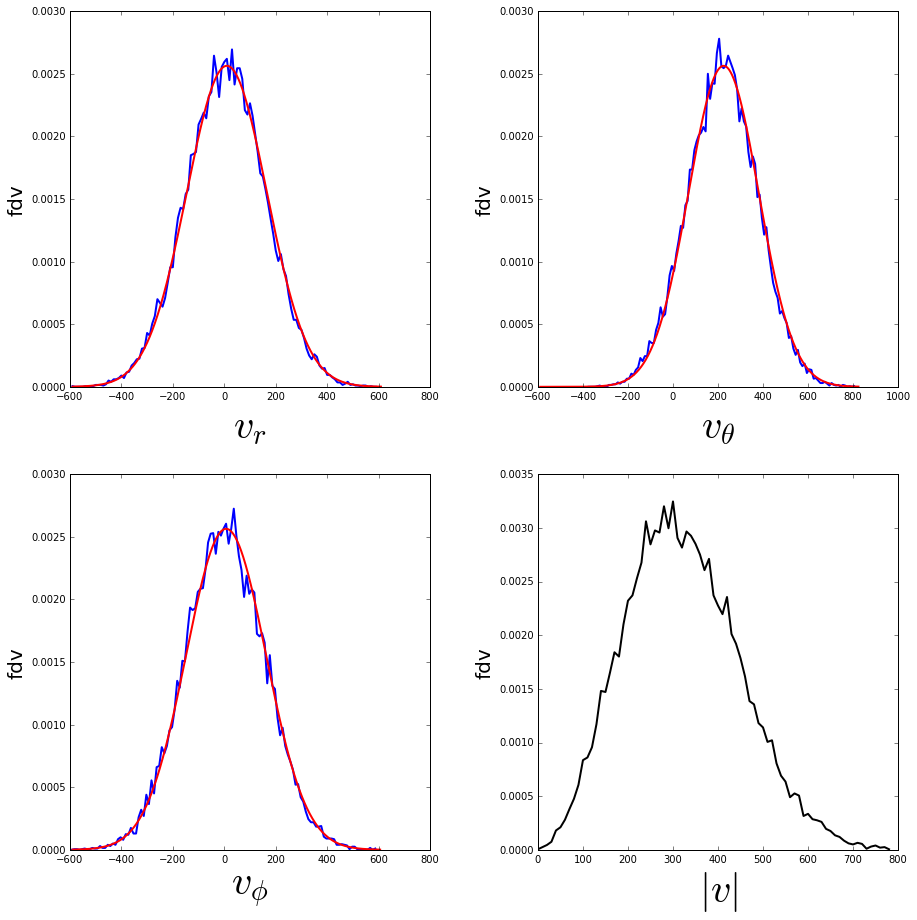

In [26]:
v_array =  [np.arange(-600+v_Sun[0],600+v_Sun[0]),
            np.arange(-600+v_Sun[0],600+v_Sun[1]),
            np.arange(-600+v_Sun[0],600+v_Sun[2])]
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12,12))
plt.tight_layout(pad=0.4, w_pad=8, h_pad=7)


ax1.set_xlabel(r'$v_r$',fontsize=40)
ax1.set_ylabel('fdv',fontsize=20)
ax1.plot(fdv_r[1][0:-1],fdv_r[0],linewidth=2.)
ax1.plot(v_array[0],gaussian(v_array[0],v_Sun[0],sigma), 'r-', linewidth=2)


ax2.set_xlabel(r'$v_{\theta}$',fontsize=40)
ax2.set_ylabel('fdv',fontsize=20)
ax2.plot(fdv_theta[1][0:-1],fdv_theta[0],linewidth=2.)
ax2.plot(v_array[1],gaussian(v_array[1],v_Sun[1],sigma), 'r-', linewidth=2)

ax3.set_xlabel(r'$v_{\phi}$',fontsize=40)
ax3.set_ylabel('fdv',fontsize=20)
ax3.plot(fdv_phi[1][0:-1],fdv_phi[0],linewidth=2.)
ax3.plot(v_array[2],gaussian(v_array[2],v_Sun[2],sigma), 'r-', linewidth=2)

ax4.set_xlabel(r'$|v|$',fontsize=40)
ax4.set_ylabel('fdv',fontsize=20)
ax4.plot(modNO_DD[1][0:-1],modNO_DD[0],'k-',linewidth=2.)




In [27]:
# earth velocity 
v_earth,_ = v_EARTH(152)
# wimps velocity distribution per coordinate
section = 1/5


def fdv_ddisc(vi,sigma, v_disc, sigma_disc):
    total_number=20000.
    ddisc_number = int(total_number/3.)
    gdisc_number = int(total_number - ddisc_number)
    data_ddisc =np.random.normal(v_disc, sigma_disc, ddisc_number)
    data_gdisc = np.random.normal(vi, sigma, gdisc_number)
    data = np.concatenate((data_ddisc,data_gdisc))
    bins = np.arange(-600+vi,600+vi,10)
    line  = np.histogram(data, bins=bins, normed=1)
    return line, data

fdv_thetaLDD, data_thetaLDD = fdv_ddisc(v_earth[1],sigma, v_earth[1]-70, sigma/4.)



modulus_LDdisc=sqrt(data_r**2 + data_thetaLDD**2 + data_phi**2)
bins = np.arange(0,800,10)
mod_LDD  = np.histogram(modulus_LDdisc, bins=bins, normed=1)



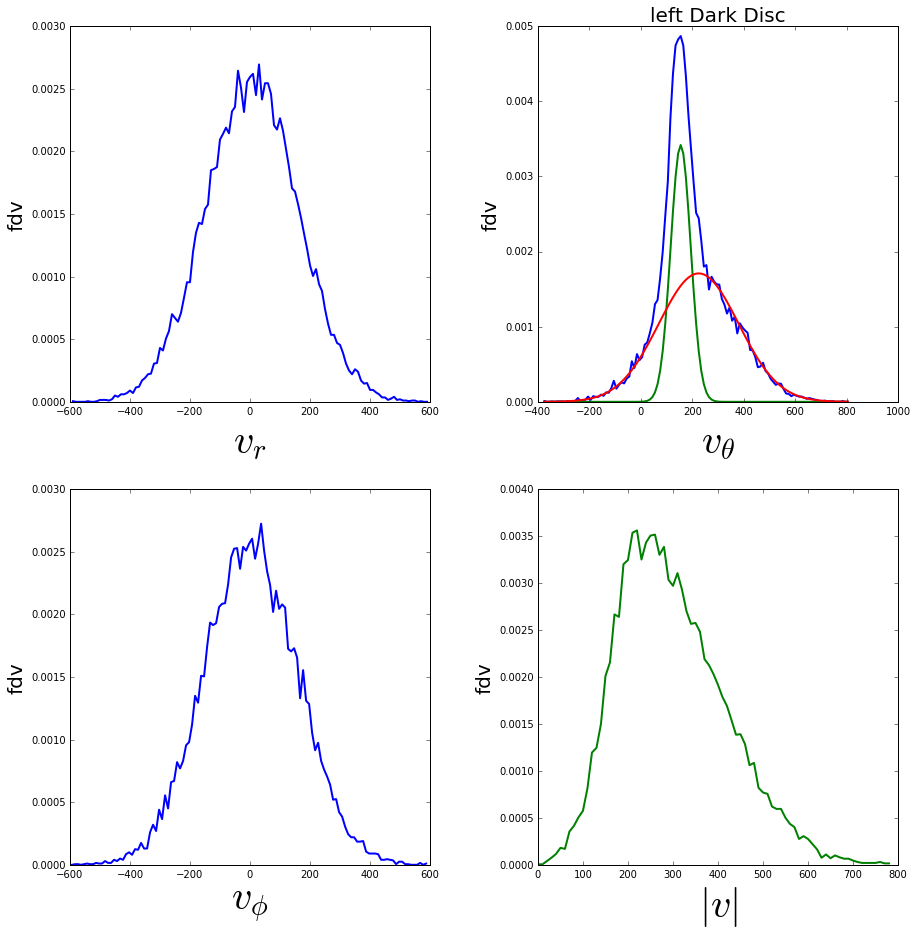

In [28]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12,12))
plt.tight_layout(pad=0.4, w_pad=8, h_pad=7)

f=lambda x,sig,mu:exp(-(x-mu)**2/(2 * sig**2))/sqrt(2* np.pi * sigma)
N=1/(3.*quad(f,-400,800,args=(sigma/4.,v_earth[1]-70))[0])
N2=2/(3.*quad(f,-400,800,args=(sigma,v_earth[1]))[0])



ax1.set_xlabel(r'$v_r$',fontsize=40)
ax1.set_ylabel('fdv',fontsize=20)
ax1.plot(fdv_r[1][0:-1],fdv_r[0],linewidth=2.)
ax2.set_title('left Dark Disc',fontsize=20)
ax2.set_xlabel(r'$v_{\theta}$',fontsize=40)
ax2.set_ylabel('fdv',fontsize=20)
ax2.plot(fdv_thetaLDD[1][0:-1],fdv_thetaLDD[0],linewidth=2.)
#f=lambda x:exp(-x**2/(2 * sigma**2))/sqrt(2* np.pi * sigma)
#n=1/quad(f,-400,800)[0]
ax2.plot(fdv_thetaLDD[1][0:-1],f(fdv_thetaLDD[1][0:-1],sigma/4.,v_earth[1]-70)*N,linewidth=2.)

ax2.plot(fdv_thetaLDD[1][0:-1],f(fdv_thetaLDD[1][0:-1],sigma,v_earth[1])*N2,linewidth=2.)

ax3.set_xlabel(r'$v_{\phi}$',fontsize=40)
ax3.set_ylabel('fdv',fontsize=20)
ax3.plot(fdv_phi[1][0:-1],fdv_phi[0],linewidth=2.)


ax4.set_xlabel(r'$|v|$',fontsize=40)
ax4.set_ylabel('fdv',fontsize=20)
ax4.plot(mod_LDD[1][0:-1],mod_LDD[0],'g-',linewidth=2.)

In [29]:
fdv_thetaRDD, data_thetaRDD = fdv_ddisc(v_earth[1],sigma, v_earth[1]+70, sigma/4.)



modulus_RDdisc=sqrt(data_r**2 + data_thetaRDD**2 + data_phi**2)
bins = np.arange(0,800,10)
mod_RDD  = np.histogram(modulus_RDdisc, bins=bins, normed=1)

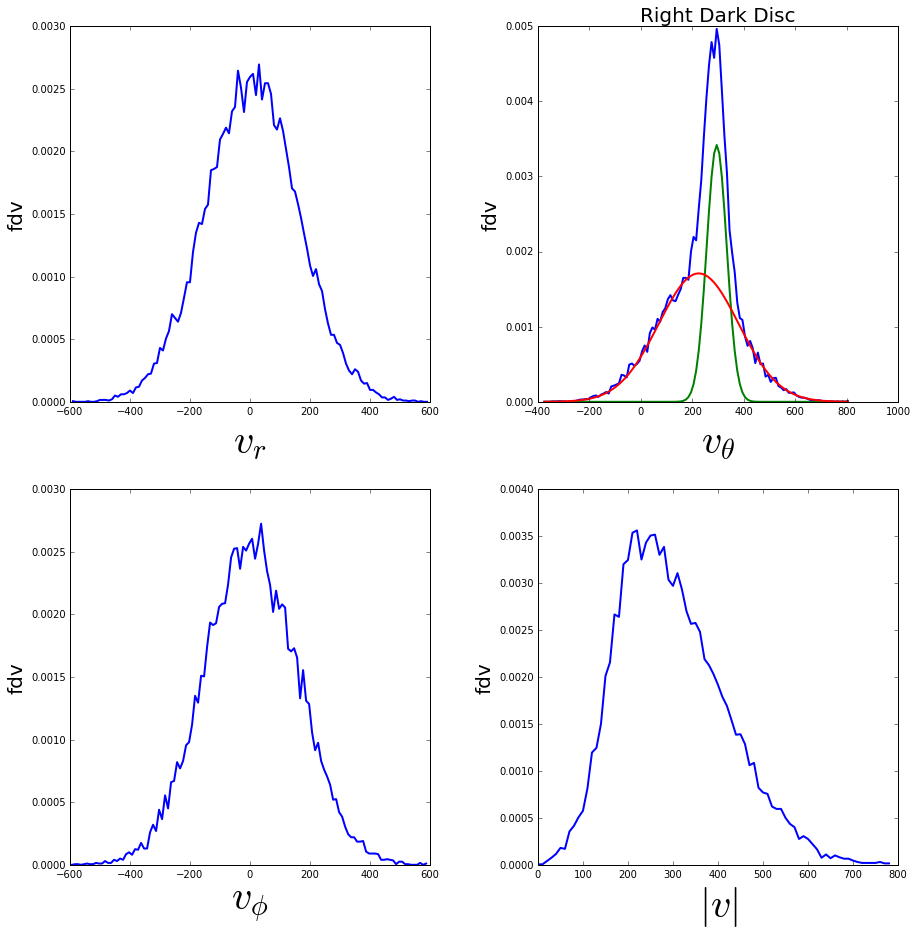

In [30]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12,12))
plt.tight_layout(pad=0.4, w_pad=8, h_pad=7)

N=1/(3*quad(f,-400,800,args=(sigma/4.,v_earth[1]+70))[0])
N2=2/(3*quad(f,-400,800,args=(sigma,v_earth[1]))[0])



ax1.set_xlabel(r'$v_r$',fontsize=40)
ax1.set_ylabel('fdv',fontsize=20)
ax1.plot(fdv_r[1][0:-1],fdv_r[0],linewidth=2.)


ax2.set_title('Right Dark Disc',fontsize=20)
ax2.set_xlabel(r'$v_{\theta}$',fontsize=40)
ax2.set_ylabel('fdv',fontsize=20)
ax2.plot(fdv_thetaRDD[1][0:-1],fdv_thetaRDD[0],linewidth=2.)
#f=lambda x:exp(-x**2/(2 * sigma**2))/sqrt(2* np.pi * sigma)
#n=1/quad(f,-400,800)[0]
ax2.plot(fdv_thetaRDD[1][0:-1],f(fdv_thetaRDD[1][0:-1],sigma/4.,v_earth[1]+70)*N,linewidth=2.)

ax2.plot(fdv_thetaRDD[1][0:-1],f(fdv_thetaRDD[1][0:-1],sigma,v_earth[1])*N2,linewidth=2.)

ax3.set_xlabel(r'$v_{\phi}$',fontsize=40)
ax3.set_ylabel('fdv',fontsize=20)
ax3.plot(fdv_phi[1][0:-1],fdv_phi[0],linewidth=2.)


ax4.set_xlabel(r'$|v|$',fontsize=40)
ax4.set_ylabel('fdv',fontsize=20)
ax4.plot(mod_LDD[1][0:-1],mod_LDD[0],'b-',linewidth=2.)

In [31]:
bin_aux = bins
x_array = np.logspace(0.1, 4, num=100)
min_bound = 0
print bins[-1]


hist_aux = modulus_NOdisc

def product_discrete(m):
    """
    the producto to be inside the integral
    """
    global x
    ancho = (bin_aux[-1]-bin_aux[0])/len(bin_aux)
    final = []
    
    for i in range(min_bound,len(bin_aux)):
        
        va2 = ca.caprate_GOU(bin_aux[i], m)#, rms=str(f)[10])
        if va2 < 0:
                final.append(1e-15)
        else:
                #print va, va2, float(va*va2)
                final.append(hist_aux[i]*va2)
    result = sum(final)*ancho
    return result


capture_fdvhist = np.vectorize(product_discrete)

790


In [32]:
hist_aux = modulus_NOdisc
capture_NODisc = capture_fdvhist(x_array)

hist_aux = modulus_LDdisc
capture_LDisc = capture_fdvhist(x_array)

hist_aux = modulus_RDdisc
capture_RDisc = capture_fdvhist(x_array)

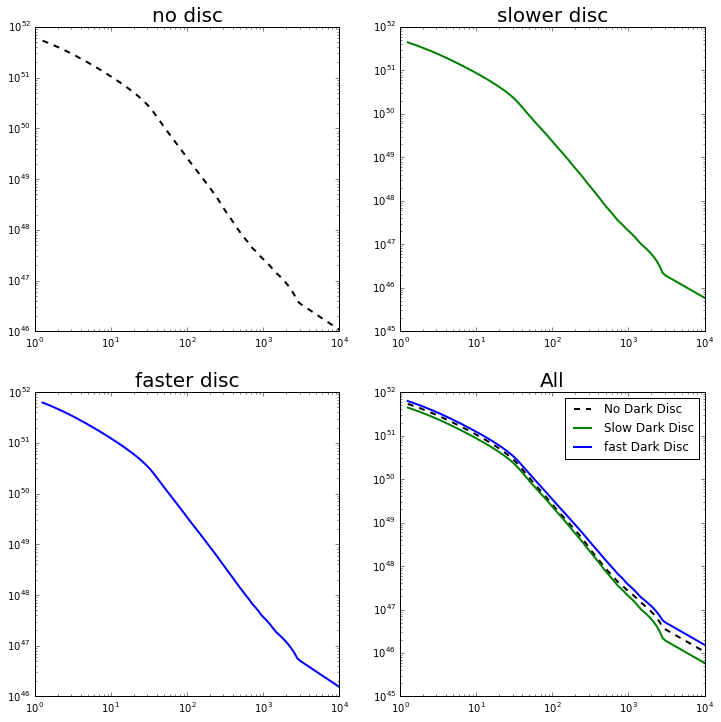

In [33]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,12))
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title('no disc',fontsize=20)
ax1.plot(x_array,capture_NODisc,'k--',linewidth=2.)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title('slower disc',fontsize=20)
ax2.plot(x_array,capture_LDisc,'g-',linewidth=2.)

ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_title('faster disc',fontsize=20)
ax3.plot(x_array,capture_RDisc,'b-',linewidth=2.)

ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_title('All',fontsize=20)
ax4.plot(x_array,capture_NODisc,'k--',linewidth=2.,label="No Dark Disc")
ax4.plot(x_array,capture_LDisc,'g-', linewidth=2.,label="Slow Dark Disc")
ax4.plot(x_array,capture_RDisc,'b-',linewidth=2.,label= "fast Dark Disc")
legend = ax4.legend(loc='upper right', shadow=False)
# The frame is matplotlib.patches.Rectangle instance surrounding the leg    end.
frame = legend.get_frame()


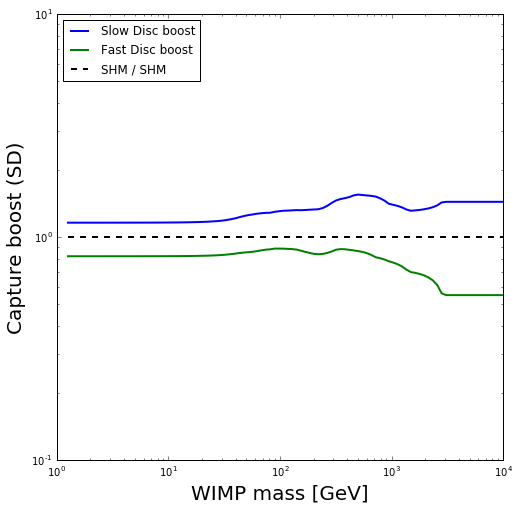

In [34]:
fast_boost = capture_RDisc / capture_NODisc
slow_boost = capture_LDisc / capture_NODisc
fig ,ax = plt.subplots(figsize=(8,8))
ax.set_xlabel('WIMP mass [GeV]',fontsize=20)
ax.set_ylabel('Capture boost (SD)',fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')











#ax.set_ylim([0.4,2.2])
    #ax.set_xlim([1,20000])
line1 = ax.plot(x_array, fast_boost,'b-', linewidth=2.0,
                    label='Slow Disc boost')
line2 = ax.plot(x_array, slow_boost,'g-', linewidth=2.0,
                    label="Fast Disc boost")
shm = [1 for i in x_array]
SHM = ax.plot(x_array, shm,'k--', linewidth=2.0,
                    label="SHM / SHM")
legend = ax.legend(loc='upper left', shadow=False)
